In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd

playtennis_path = ('/content/drive/MyDrive/Colab Notebooks/dataset/머신러닝/playtennis.csv')
tennis_data = pd.read_csv(playtennis_path)

tennis_data

Outlook Temperature Humidity    Wind PlayTennis
0      Sunny         Hot     High    Weak         No
1      Sunny         Hot     High  Strong         No
2   Overcast         Hot     High    Weak        Yes
3       Rain        Mild     High    Weak        Yes
4       Rain        Cool   Normal    Weak        Yes
5       Rain        Cool   Normal  Strong         No
6   Overcast        Cool   Normal  Strong        Yes
7      Sunny        Mild     High    Weak         No
8      Sunny        Cool   Normal    Weak        Yes
9       Rain        Mild   Normal    Weak        Yes
10     Sunny        Mild   Normal  Strong        Yes
11  Overcast        Mild     High  Strong        Yes
12  Overcast         Hot   Normal    Weak        Yes
13      Rain        Mild     High  Strong         No

In [ ]:
tennis_data.Outlook = tennis_data.Outlook.replace('Sunny','0')
tennis_data.Outlook

tennis_data

tennis_data.Outlook.replace('Overcast','1', inplace=True)
tennis_data.Outlook.replace('Rain','2', inplace=True)

tennis_data.Temperature.replace("Hot", 1, inplace=True)
tennis_data.Temperature.replace("Mild", 2, inplace=True)
tennis_data.Temperature.replace("Cool", 1, inplace=True)

tennis_data.Humidity.replace("High", 1, inplace=True)
tennis_data.Humidity.replace("Normal", 2, inplace=True)

tennis_data.Wind.replace("Weak", 1, inplace=True)
tennis_data.Wind.replace("Strong", 2, inplace=True)

tennis_data.PlayTennis.replace("No", 1, inplace=True)
tennis_data.PlayTennis.replace("Yes", 2, inplace=True)

tennis_data

Outlook  Temperature  Humidity  Wind  PlayTennis
0        0            1         1     1           1
1        0            1         1     2           1
2        1            1         1     1           2
3        2            2         1     1           2
4        2            1         2     1           2
5        2            1         2     2           1
6        1            1         2     2           2
7        0            2         1     1           1
8        0            1         2     1           2
9        2            2         2     1           2
10       0            2         2     2           2
11       1            2         1     2           2
12       1            1         2     1           2
13       2            2         1     2           1

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier()

dt_clf = DecisionTreeClassifier()

# 의사결정 트리를 만들 객체 
#dt_clf.fit(x,y)
#dt_clf.fit : DecisionTree 생성
# x : 독립변수
# y : 종속변수

dt_clf 


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

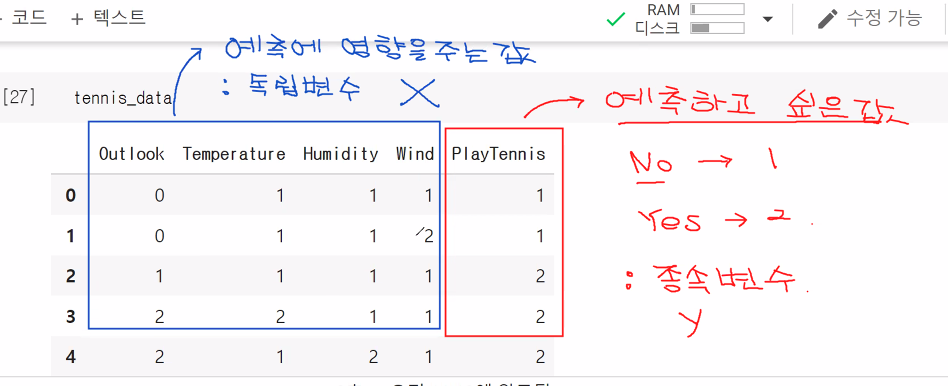

In [ ]:

tennis_data

# 예측하고 싶은 값 
# no -> 1 / yes -> 2 
# : 종속변수 y

tennis_data["PlayTennis"] # 종속변수 예측하고 싶은 값

y = tennis_data["PlayTennis"] 
y

0     1
1     1
2     2
3     2
4     2
5     1
6     2
7     1
8     2
9     2
10    2
11    2
12    2
13    1
Name: PlayTennis, dtype: int64

In [ ]:
# [ : ] : 모든 줄 이름
# ["Outlook" : 'Wind'] : Outlook 칸이상 Wind칸 이하
# = 예측(테니스 치나?) 에 영향 주는 값 : 독립변수 X
# 독립변수만 출력

tennis_data.loc [ : , "Outlook" : 'Wind']
X = tennis_data.loc [ : , "Outlook":"Wind"]
X

Outlook  Temperature  Humidity  Wind
0        0            1         1     1
1        0            1         1     2
2        1            1         1     1
3        2            2         1     1
4        2            1         2     1
5        2            1         2     2
6        1            1         2     2
7        0            2         1     1
8        0            1         2     1
9        2            2         2     1
10       0            2         2     2
11       1            2         1     2
12       1            1         2     1
13       2            2         1     2

In [ ]:
# dt_clf.fit : 의사결정 트리
# 출력되지 않고 dt_clf안에 저장
# x : 독립변수 : 예측에 영향을 주는 값
# y : 종속변수 : 예측하고 싶은값 playtennis칸 테니스 쳤나? no:1 yes:2
dt_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# 종속변수 예측 

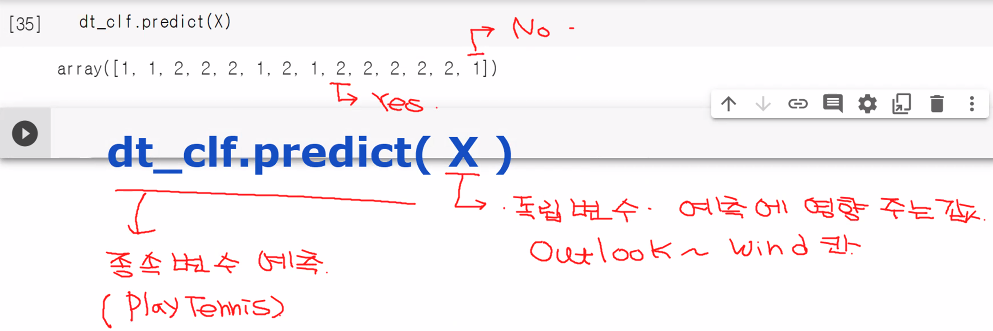

In [ ]:
# X : 독립변수 예측에 영향을 주는 값 Outlook~wind 칸
# array([1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1]) : 예측값

dt_clf.predict(X) # ->  array([1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1])

dt_predict = dt_clf.predict(X)
dt_predict

array([1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1])

In [ ]:
from sklearn.metrics import accuracy_score

# y : 진짜로 테이스 여부
# dt_predict) : 예측값
# = 예측값과 진짜값이 같은 이율

# y : 진짜로 테니스 쳤나?-> 진짜값
y

# 정확도 측정(종속변수, 예측)
accuracy_score(y, dt_predict)

1.0

## 독립변수들 이름 지정

In [ ]:
from sklearn import tree

# dt_clf : decision Tree 객체 쓰면 내용출력됨
tree.export_graphviz(dt_clf)

# 독립변수들의 칸 이름 지정 
#  [label="X[2] <=2번째 칸이 뭔지 모름 -> 칸이름 나오게 하기
# Outcast = 1, Rain(2), Sunny(0)
# Humidity -> high(1), nomal(2)
# 종속 변수 : no(1), yes(2)
tree.export_graphviz(dt_clf, feature_names= ["Outlook",'Temperature','Humidity',"Wind"]
                    , class_names = ['No',"Yes"]) # 값 적은 no부터

# = decision tree 내용 글씨로 리턴
dt_dot_data = tree.export_graphviz(dt_clf
                                   , feature_names= ["Outlook",'Temperature','Humidity',"Wind"]
                                   , class_names = ['No',"Yes"])

# decision tree 내용 -> 글씨로 리턴
dt_dot_data 

'digraph Tree {\nnode [shape=box] ;\n0 [label="Humidity <= 1.5\\ngini = 0.459\\nsamples = 14\\nvalue = [5, 9]\\nclass = Yes"] ;\n1 [label="Outlook <= 0.5\\ngini = 0.49\\nsamples = 7\\nvalue = [4, 3]\\nclass = No"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 3\\nvalue = [3, 0]\\nclass = No"] ;\n1 -> 2 ;\n3 [label="Outlook <= 1.5\\ngini = 0.375\\nsamples = 4\\nvalue = [1, 3]\\nclass = Yes"] ;\n1 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 2]\\nclass = Yes"] ;\n3 -> 4 ;\n5 [label="Wind <= 1.5\\ngini = 0.5\\nsamples = 2\\nvalue = [1, 1]\\nclass = No"] ;\n3 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]\\nclass = Yes"] ;\n5 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]\\nclass = No"] ;\n5 -> 7 ;\n8 [label="Outlook <= 1.5\\ngini = 0.245\\nsamples = 7\\nvalue = [1, 6]\\nclass = Yes"] ;\n0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n9 [label="gini = 0.0\\nsamples = 4\\nvalue = [0, 

# 그림으로 출력하기

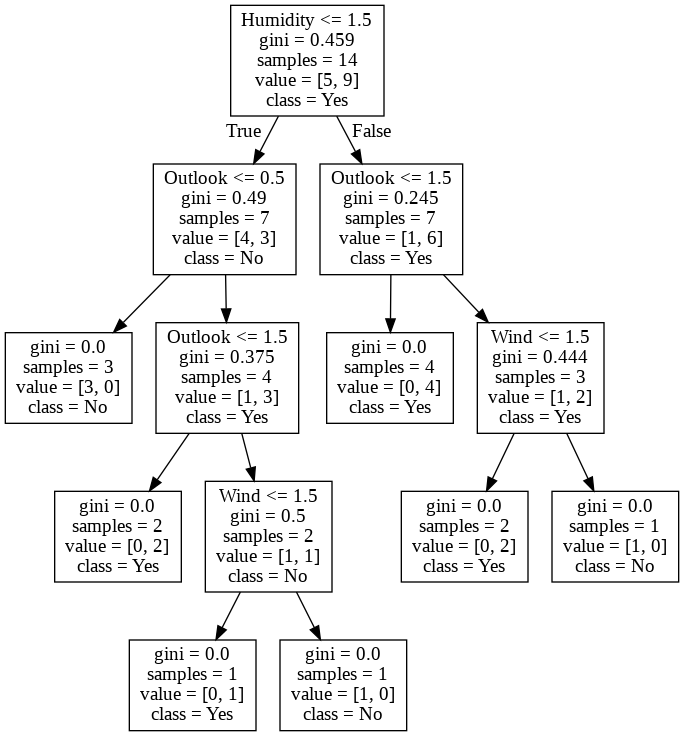

In [ ]:
# 그림으로 출력하기 p69
import pydotplus

# dt_dot_Data의 내용을 그림으로 바꿀 객체 생성
pydotplus.graph_from_dot_data(dt_dot_data)

# 변수 저장
# dt_dot_data =  decision tree 내용 -> 글씨로 저장이 되어있음
# dt_dot_data를 이미지로 바꿀 객체 생성 -> dt_graph에 저장
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

# png 생성
# dt_dot_data 의 내용을 이미지로 변환 리턴
# 변환은 되었지만 글씨로 되어있음
dt_graph.create_png()

# p56 이미지import
# 이미지를 보려면 이미지 함수 사용해야함
from IPython.display import Image
Image(dt_graph.create_png())

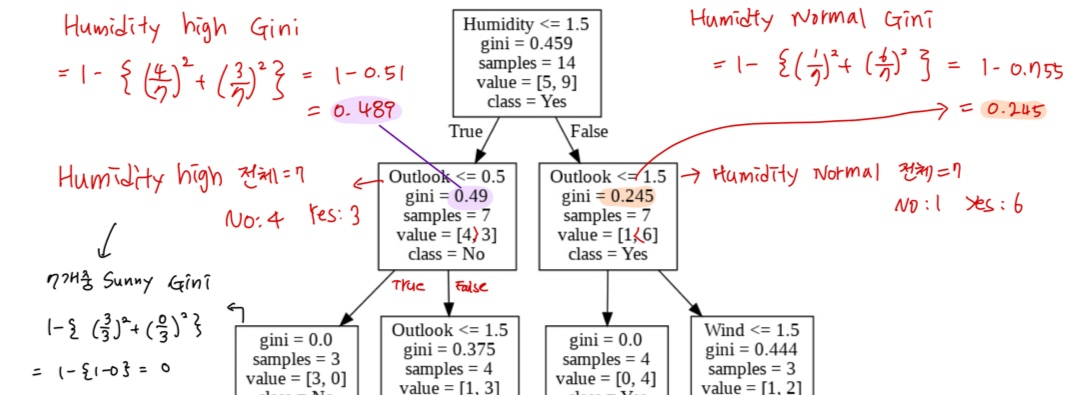

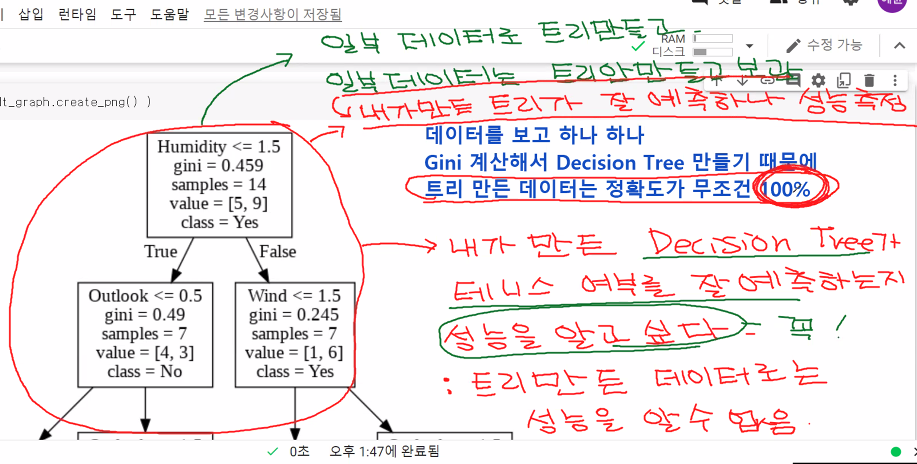

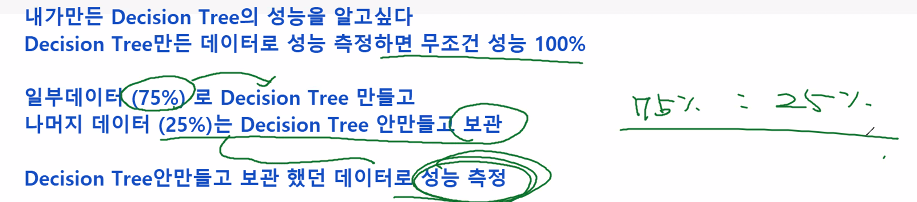

# train_test_split
1. 로드된 train_test_split 모듈을 이용해 변수 X에 입력한 4개 컬럼에 대한 데이터와 변수 Y에 입력한 Playtennis 컬럼의 데이터를 train(훈련)과 test(테스트)로 구분해, 임의의 개수로 각각 변수 X_train,X_test,y_train,y_test에 저장

*비율
train = 7.5
test = 2.5

In [ ]:
# 내가만든 Decision Tree가 잘 예측 하는가
# 일부데이터로는 트리만들고
# 일부데이터는 트리 안만들고 보관했다가 내가 만든 트리가 잘예측하나 성능 평가

In [ ]:
# 독립변수 X의 75% -> X_train
# 독립변수 X의 25% -> X_test
# 종속변수 y의 75% -> y_train
# 종속변수 y의 25% -> y_test

# X_train  :  성신이한테 알려줄 상황 10개
# X_test : 성신이한테 나중에 물어볼 4개
# y_train :  성신이한테 알려준 상황10개에 대한 정답
# y_test :  성신이한테 나중에 물어볼 4개에 대한 정답

In [ ]:
from sklearn.model_selection import train_test_split

# 종속변수 : 예측하고 싶은 값
y

# x :독립 변수 
# 종속변수(테니스여부)에 영향을 주는 값
X

# p63
# train_test_split(X,y)
# 독립변수 X의 75% , 종속변수 y의 75% = tree 만듬 -> 학습데이터 train data
# 독립변수 X의 25% , 종속변수 y의 25% = tree 안만들고 보관했다가 tree의 [성능 측정] ->측정 데이터 test data

train_test_split(X,y)

X_train,X_test,y_train,y_test = train_test_split(X,y)
X_train
X_test
y_train
y_test

12    2
9     2
0     1
5     1
Name: PlayTennis, dtype: int64

## p64 예측값 보기???


dt_clf = DecisionTreeClassifier()

1. 로드된 의사결정 트리 분류모듈을 변수 dt_clf에 저장
2. 의사결정 트리 분류 모듈이 저장된 변수 dt_clf의 함수 fit()에 변수 X_train,y_train을 입력해 의사결정 트리 분류 모델 생성

, 생성한 모델을 다시 변수 dt_clf에저장

빈 분류기에 10개의 상황을 알려주겠습니다  
->  dt_clf.fit (X_Train, y_train)

10개의 상황을 알고있는 분류기한테 
아직모르는 4개의 상황(x_test)을 줘서 정답을 예측해보겠습니다
 dt_clf.predict(X_test)

In [133]:
# 의사결정 분류기 하나 불러오기
dt_clf = DecisionTreeClassifier()

# 불러온 분류기에 내 데이터 적용
dt_clf.fit(X_train, y_train)

# 분류기로 (X_test) = 예측
dt_clf.predict(X_test)


array([2, 2, 1, 2])

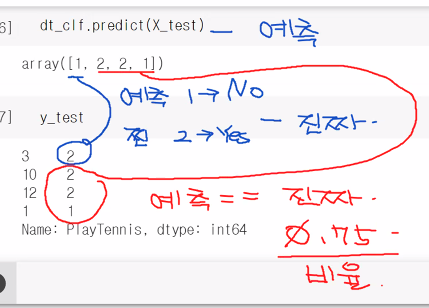

## Accuracy 정확도
- 모델이 정확하게 분류 또는 예측하는 데이터의 비율
- Accuracy의 한계
  1. 2 class 문제에서 class yes에 해당하는 데이터는 9900건, class no에 해당하는 데이터는 100건이 존재할 경우
  2. 모델이 모든 데이터를 class yes로 예측할 경우에도 즉, class no를 예측하지 못했음에도 불구하고 이러한 경우가 있어 accuracy 모델은 성능을 측정하는 척도로 적합 하지 않음 

In [130]:
# p66 
# 변수 dt_clf의 함수 predict()에 변수 X_test를 입력, 입력한 X_test에 대한 클래스 예측 값을 변수 df_prediction에 저장
dt_prediction = dt_clf.predict(X_test)

dt_prediction

array([2, 2, 1, 2])

In [131]:
y_test

# p64 예측값이랑 정확도 비교?
accuracy_score(y_test, dt_prediction)

0.75

In [132]:
tennis_data
tennis_data.columns.tolist()

#독립변수들의 이름만 리턴
tennis_data.columns.tolist()[0:4]

['Outlook', 'Temperature', 'Humidity', 'Wind']

# 실습

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.model_selection import train_test_split
import numpy as np

In [134]:
playtennis_path = '/content/drive/MyDrive/Colab Notebooks/dataset/머신러닝/playtennis.csv'
tennis_data = pd.read_csv(playtennis_path)

In [ ]:
tennis_data.Outlook = tennis_data.Outlook.replace("Sunny",0).replace("Overcast",1).replace("Rain",2)
tennis_data.Temperature = tennis_data.Temperature.replace("Hot",1).replace("Mild",2).replace("Cool",3)
tennis_data.Humidity = tennis_data.Humidity.replace("High",1).replace("Normal",2)
tennis_data.Wind = tennis_data.Wind.replace("Weak",1).replace("Strong",2)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace("No",1).replace("Yes",2)

In [ ]:
tennis_data

In [ ]:
X = np.array(pd.DataFrame(tennis_data,columns = ['Outlook','Temperature','Humidity','Wind']))
y = np.array(pd.DataFrame(tennis_data,columns = ['PlayTennis']))

In [ ]:
X_train,X_test,y_train,y_test =  train_test_split(X,y)

In [ ]:
# 의사결정 분류기 하나 불러오기
dt_clf = DecisionTreeClassifier()

# 불러온 분류기에 내 데이터 적용
dt_clf = dt_clf.fit(X_train,y_train)

# 분류기로 X_test 넣어서 예측 
dt_prediction =  dt_clf.predict(X_test)

# 예측값과 정답값(y_test) 정확도 비교
accuracy = accuracy_score(y_test,dt_prediction)
print("정확도" ,accuracy)

In [ ]:
feature_names = tennis_data.columns.tolist()
feature_names = feature_names[0:4]
target_name = np.array(['Play No','Play Yes'])

In [ ]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                   feature_names = feature_names,
                                   class_names = target_name,
                                   filled = True, rounded = True,
                                   special_characters = True
                                   )

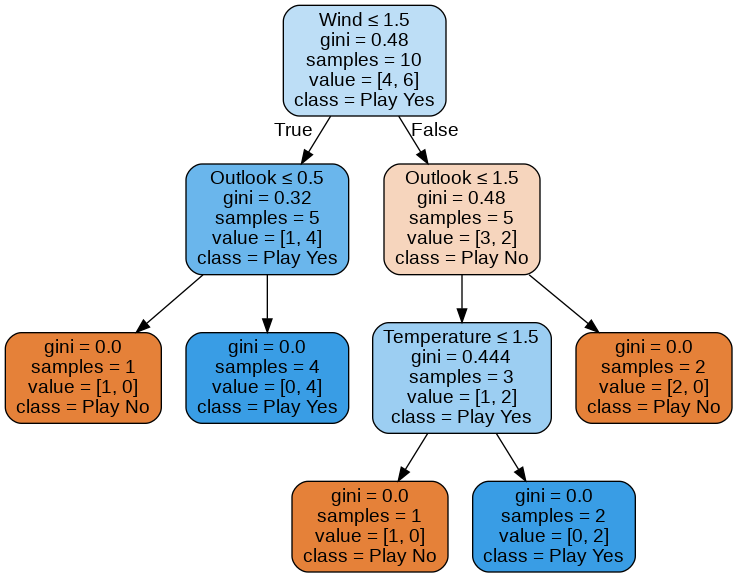

In [ ]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())